In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm.auto import tqdm

/hetghome/antonpr/miniconda3/envs/stable_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
sys.path.append("/hetghome/antonpr/xmax_sigma/flincpy")
from cascade.cascade_driver import CascadeDriver, InteractionModel

In [3]:
import chromo
target = chromo.kinematics.CompositeTarget([("N", 0.78), ("O", 0.22)])
ekin = chromo.kinematics.FixedTarget(1e3, "p", target)
model = chromo.models.Sibyll23d
    
int_model0 = InteractionModel(model, ekin, target)

 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..


In [5]:
cas_driver = CascadeDriver(int_model0)

In [6]:
mceq_decaying_pdgs = [-11, 11, -12, 12, -13, 13, -14, 14, 
                      -16, 16, 22, 
                        111, 130, -211, 211, 310, -321, 321, 
                        -411, 411, -421, 421, -431, 431, 
                        -2112, 2112, -2212, 2212, -3122, 3122
                        ]


cas_driver.simulation_parameters(pdg = 2212, energy = 1e2, 
                                 zenith_angle = 0, xdepth = 0,
                                 threshold_energy = 1e-6, stop_height = 0,
                                 accumulate_runs = True, reset_ids = True,
                                 mceq_decaying_pdgs = mceq_decaying_pdgs)


MCEqRun::set_interaction_model(): DPMJETIII191
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)
Tabulate cross-section for pi0(111)
Tabulate cross-section for K_L0(130)
Tabulate cross-section for pi-(-211)
Tabulate cross-section for pi+(211)
Tabulate cross-section for K_S0(310)
Tabulate cross-section for K-(-321)
Tabulate cross-section for K+(321)
Tabulate cross-section for D-(-411)
Tabulate cross-section for D+(411)
Tabulate cross-section for Dbar0(-421)
Tabulate cross-section for D0(421)
Tabulate cross-section for D_s-(-431)
Tabulate cross-section for D_s+(431)
Tabulate cross-section for nbar0(-2112)
Tabulate cross-section for n0(2112)
Tabulate cross-section for pbar-(-2212)
Tabulate cross-section for p+(2212)
Tabulate cross-section for Lambdabar0(-3122)
Tabulate cross-section for Lam

In [17]:
niter = 10000
for i in tqdm(range(niter), total = niter):
    cas_driver.run()

  0%|          | 8/10000 [00:00<02:08, 77.64it/s]

100%|██████████| 10000/10000 [01:13<00:00, 136.42it/s]


In [18]:
from cascade.cascade_analysis import CascadeAnalysis
cascade_analysis = CascadeAnalysis(cas_driver)
cascade_analysis.print_stats()

Number of runs = 11000
Initial state:
  $p$(2212) with energy = 1.000e+02

Final state:
  Number of all particles in cascade = 830441
  Number of final particles = 553681
  Number of interactions = 14412
  Number of decays = 262348
  Max number of generations = 7

  Max xdepth = 1036.0992336839001
  Exectution time = 80.28 s
  Exectution time per run = 0.01 s
  Size of cascade_driver object = 200.26 Mb

Energy conservation in cascade:
  Initial energy = 1.00000e+02 GeV
  Energy in final particles = 9.83929e+01 GeV
  Relative loss(+)/gain(-) 1.607e-02
All final ids are unique, min = 1, max = 830440


{22: 132411, 14: 90268, -14: 87303, 11: 50518, -12: 49670, -11: 41425, 12: 40577, 2212: 30762, -13: 15723, 13: 12758, -2212: 1237, 2112: 1027, -211: 1, 211: 1}


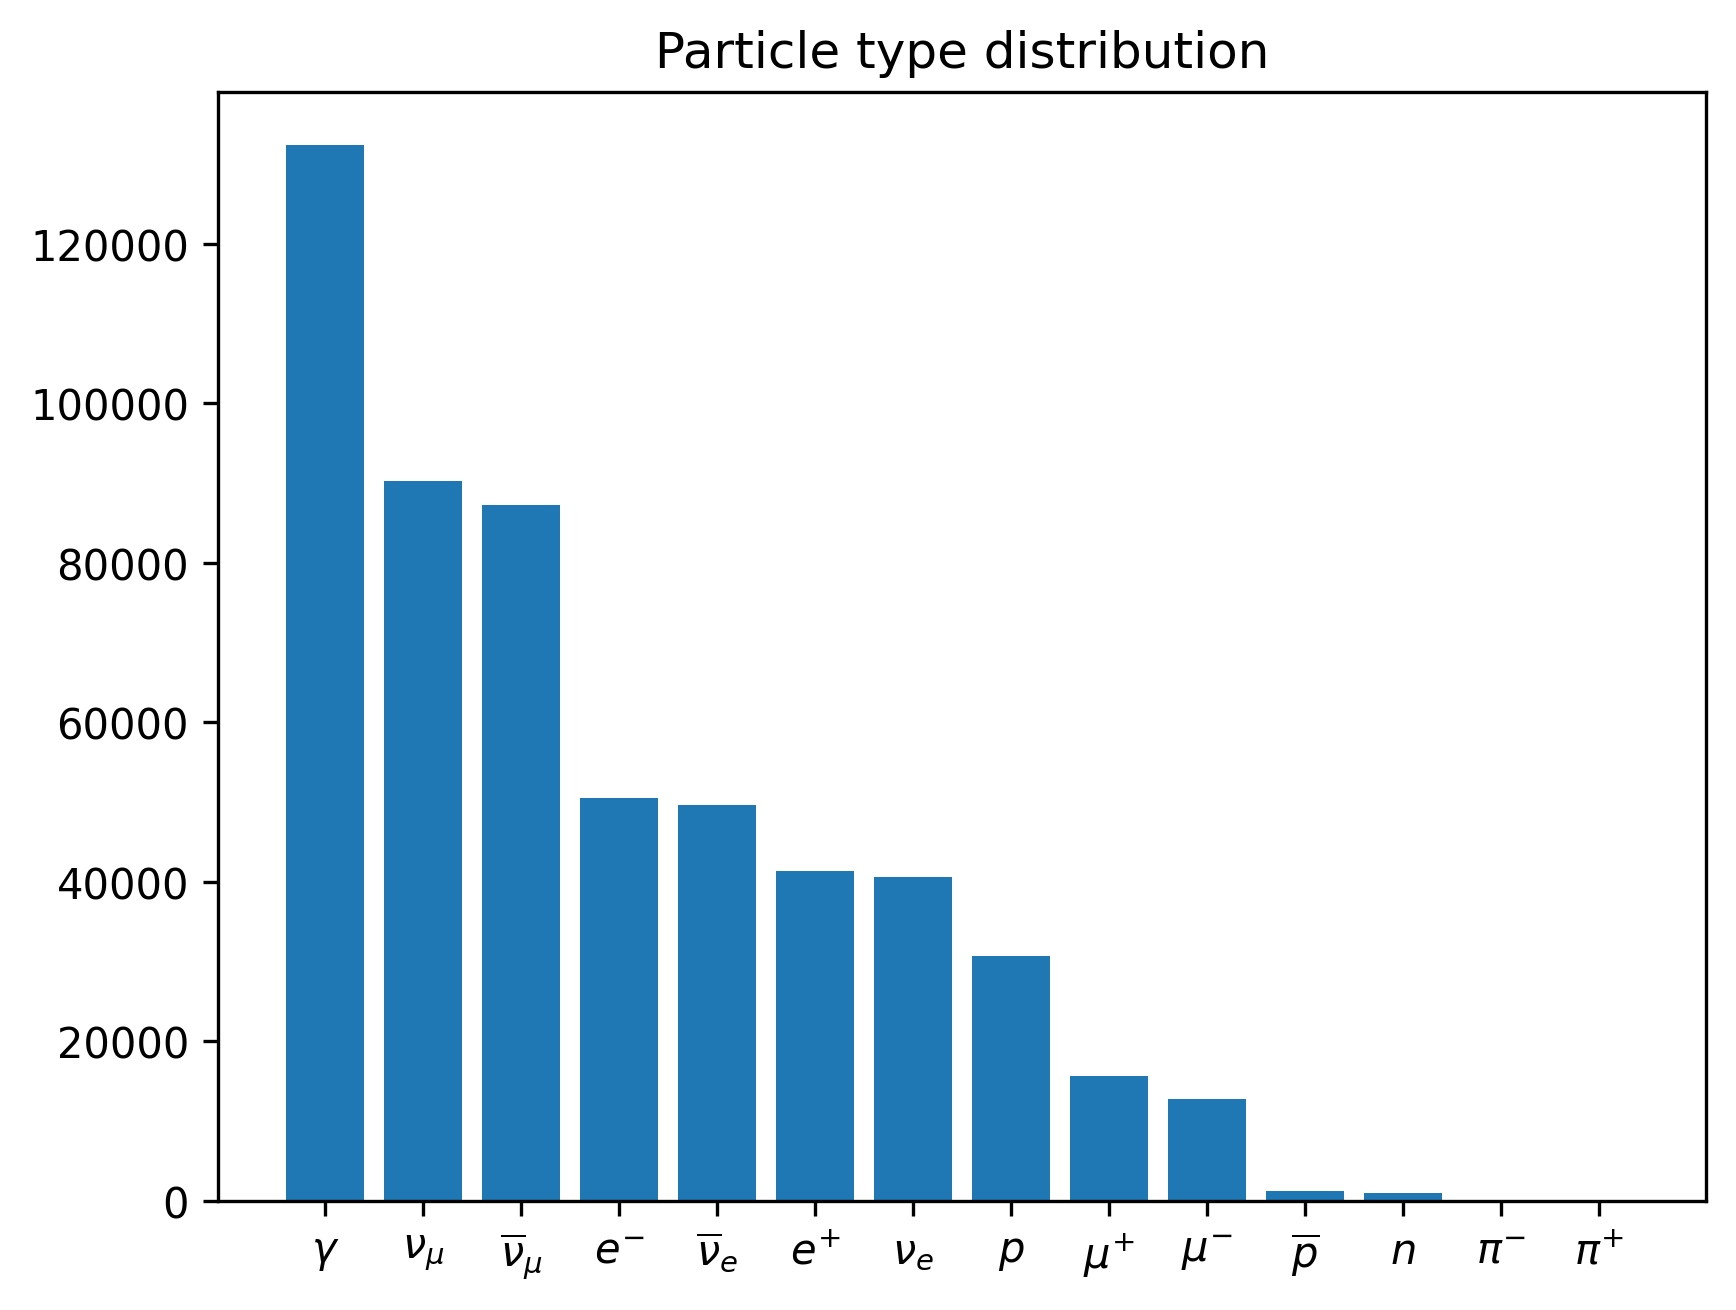

In [19]:
cascade_analysis.plot_ptypes_dist(from_ = 0)

In [10]:
%reload_ext autoreload
%autoreload 2
from mceq_comparison import MCEQDistributions
import matplotlib.pylab as plt
mceq_noloss = MCEQDistributions(
                 energy = 1e2,
                 pdg_id = 2212,
                 theta_deg = 0,
                #  slant_depth = 800,
                #  slant_depth = 635.9540964571235,
                #  slant_depth= 313.4599011471651,
                #  slant_depth=1193,
                #  slant_depth=2997,
                 energy_range=[0.5e-1, 1e3],
                 slant_depth=1033.0,
                 pname_tuples = [
                     ("mu", "mu+", "mu-"),
                     ("numu", "numu", "antinumu"),
                     ("nue", "nue", "antinue"),
                    #  ("pi", "pi+", "pi-"),
                    #  ("el", "e+", "e-"),
                    #  ("e+", "e+"),
                    #  ("e-", "e-")
                     ],
                #  interaction_model = "DPMJET-III-19.1",
                interaction_model = "SIBYLL23D",
                 generic_losses_all_charged = False, 
                 enable_energy_loss = False, 
                 muon_helicity_dependence = False,
                 disable_decays = [],
                 hybrid_crossover=0.01,
                 density_model = ("CORSIKA", ("BK_USStd", None)))
                #  disable_decays = [-13, 13, -211, 211]
mceq_dist = mceq_noloss

MCEqRun::set_interaction_model(): SIBYLL23D
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)


In [ ]:
mceq_noloss_01 = MCEQDistributions(
                #  energy = 1.12201845e+06,
                 energy = 1e6,
                 pdg_id = 2212,
                 theta_deg = 0,
                #  slant_depth = 800,
                #  slant_depth = 635.9540964571235,
                #  slant_depth= 313.4599011471651,
                #  slant_depth=1193,
                #  slant_depth=2997,
                 energy_range=[0.5e-1, 1e3],
                 slant_depth=1033.0,
                 pname_tuples = [
                     ("mu", "mu+", "mu-"),
                     ("numu", "numu", "antinumu"),
                     ("nue", "nue", "antinue"),
                    #  ("pi", "pi+", "pi-"),
                    #  ("el", "e+", "e-"),
                    #  ("e+", "e+"),
                    #  ("e-", "e-")
                     ],
                 interaction_model = "DPMJET-III-19.1",
                #  interaction_model = "SIBYLL",
                 generic_losses_all_charged = False, 
                 enable_energy_loss = False, 
                 muon_helicity_dependence = False,
                 disable_decays = [],
                 hybrid_crossover=1,
                 density_model = ("CORSIKA", ("BK_USStd", None)))
                #  disable_decays = [-13, 13, -211, 211]

In [36]:
mceq_dist = mceq_noloss_01

In [ ]:
mceq_dist.mceq_run.e_grid

Histogram of -13 with mass 0.10565837550000001
Histogram of 13 with mass 0.10565837550000001


Text(0, 0.5, 'Counts/bin/primary')

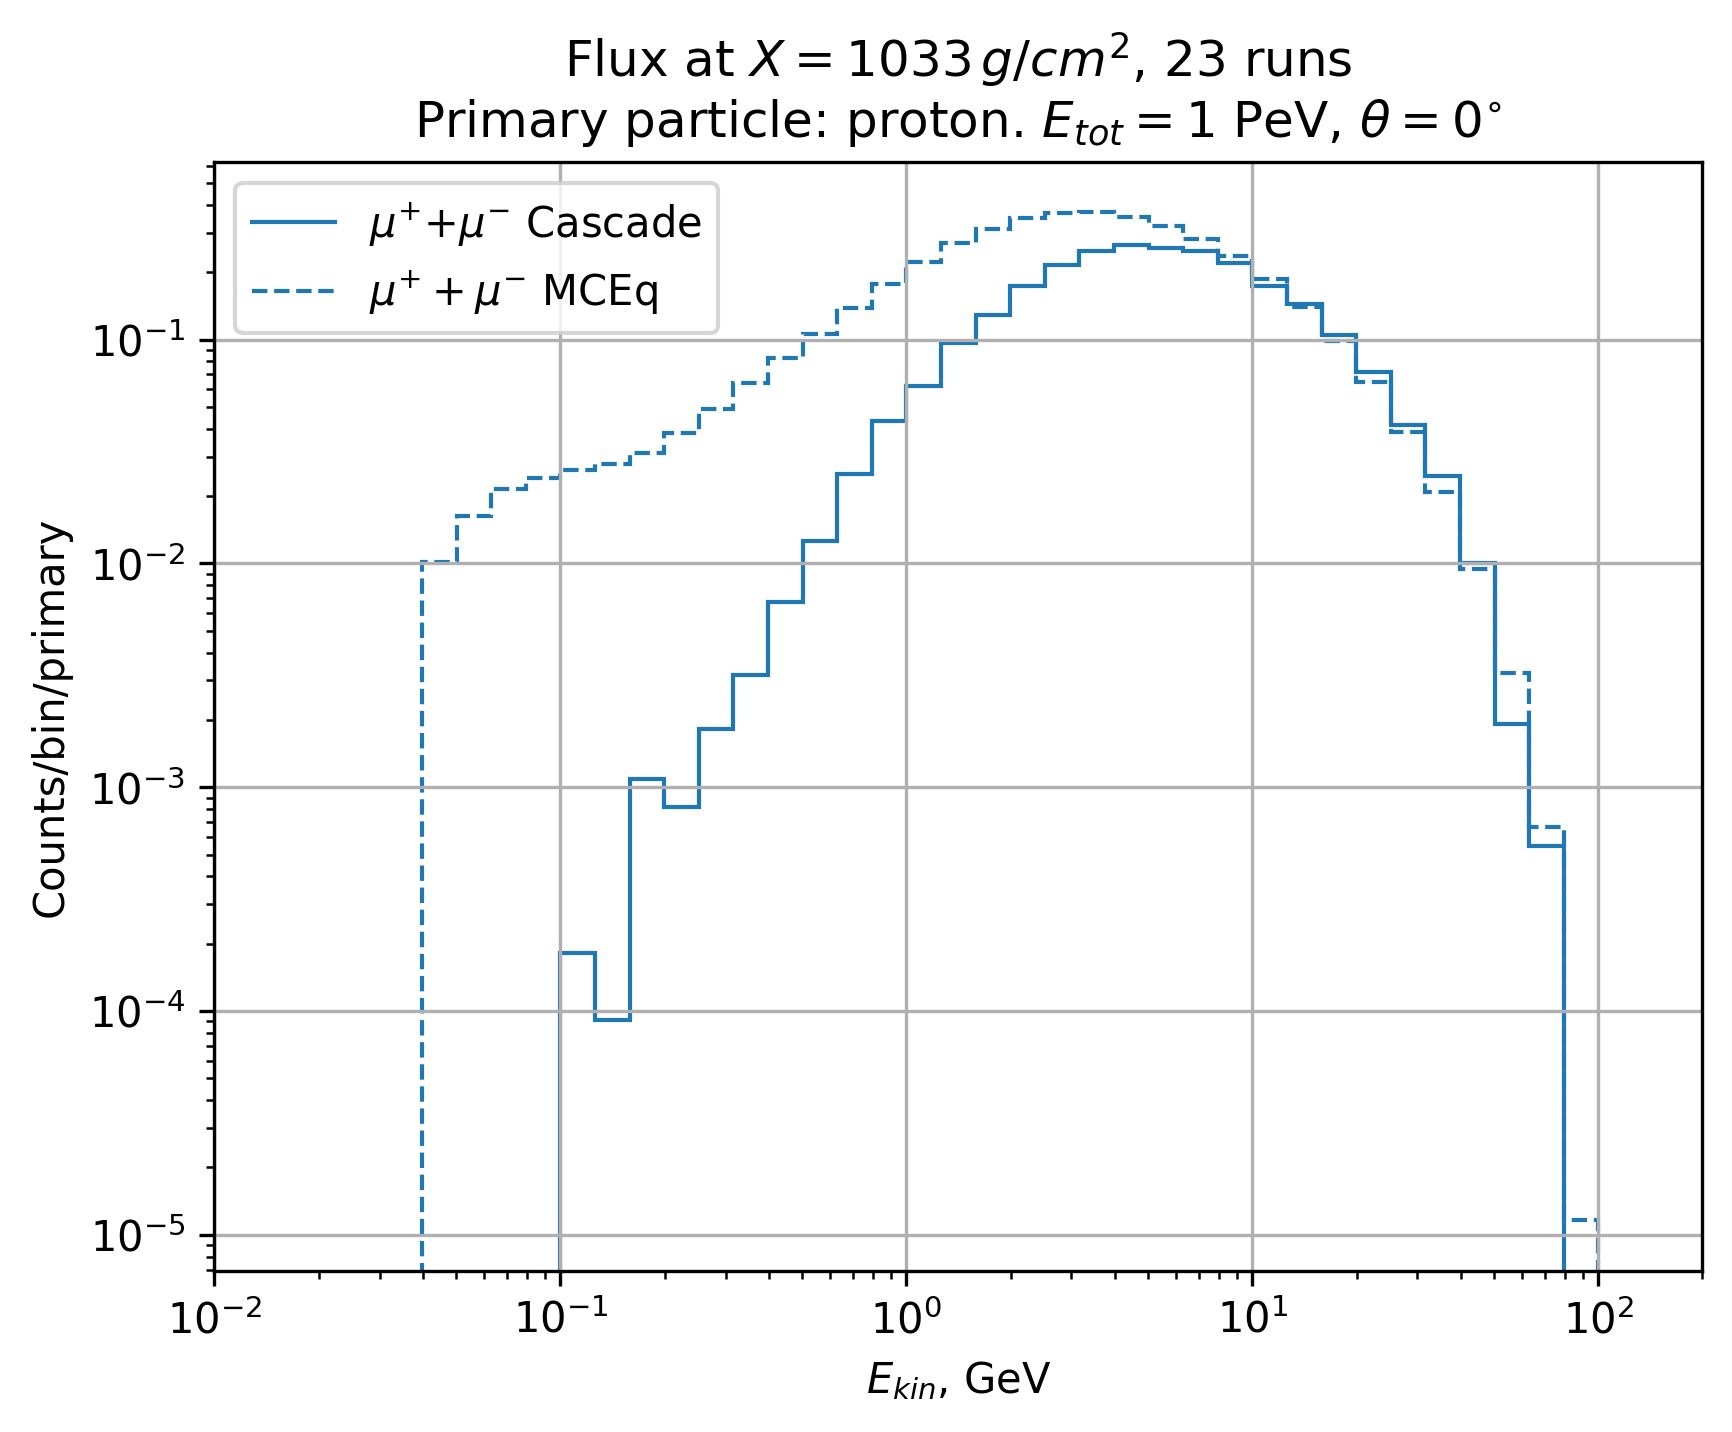

In [20]:
plt.rcParams["figure.dpi"] = 300
line_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-13, 13), bins = mceq_dist.e_bins)
plt.stairs(hist, bins, label = f"{label} Cascade", linestyle='-', color = line_colors[0])

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-12, -12), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = f"{label} Cascade", linestyle='-', color = line_colors[1])

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-14, 14), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = f"{label} Cascade", linestyle='-', color = line_colors[2])

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-211, 211), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11, 11), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11,), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (11,), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

plt.stairs(mceq_dist.flux["mu"], mceq_dist.e_bins, 
           label = r"${\mu}^{+} + {\mu}^{-}$ MCEq", linestyle='--',
           color = line_colors[0])


# plt.stairs(mceq_loss.flux["mu"], mceq_dist.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ loss mceq", linestyle=':')

# plt.stairs(mceq_hybrid.flux["mu"], mceq_dist.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq hb", linestyle='--')
# plt.stairs(mceq_dist.flux["numu"], mceq_dist.e_bins, 
#            label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ MCEq", linestyle='--',
#            color = line_colors[2])
# plt.stairs(mceq_dist.flux["nue"], mceq_dist.e_bins, 
#            label = r"$\bar{\nu}_{e} + {\nu}_{e}$ MCEq", linestyle='--',
#            color = line_colors[1])
# plt.stairs(mceq_dist.flux["pi"], mceq_dist.e_bins, 
#            label = r"$\bar{\pi}^{+} + {\pi}^{-}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["el"], mceq_dist.e_bins, 
#            label = r"$\bar{e}^{+} + {e}^{-}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["e+"], mceq_dist.e_bins, 
#            label = r"${e}^{+}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["e-"], mceq_dist.e_bins, 
#            label = r"${e}^{-}$ mceq", linestyle='--')

plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-2, 2e2)
# plt.ylim(1e-7, 1e4)
plt.legend()
plt.grid()
plt.title("Flux at " +  r"$X = 1033\, g/cm^2$, 23 runs"+ "\nPrimary particle: proton. " 
          +  r"$E_{tot}=1$ PeV" + r", $\theta = 0^{\circ}$")
plt.xlabel(r"$E_{kin}$, GeV")
plt.ylabel(r"Counts/bin/primary")
# plt.savefig('temp.png', transparent=True)

Histogram of -13 with mass 0.10565837550000001
Histogram of 13 with mass 0.10565837550000001


/tmp/ipykernel_3915337/3827853514.py:3: RuntimeWarning: invalid value encountered in divide
  plt.stairs(hist/mceq_dist.flux["mu"], mceq_dist.e_bins,


Text(0, 0.5, 'Cascade/MCEq')

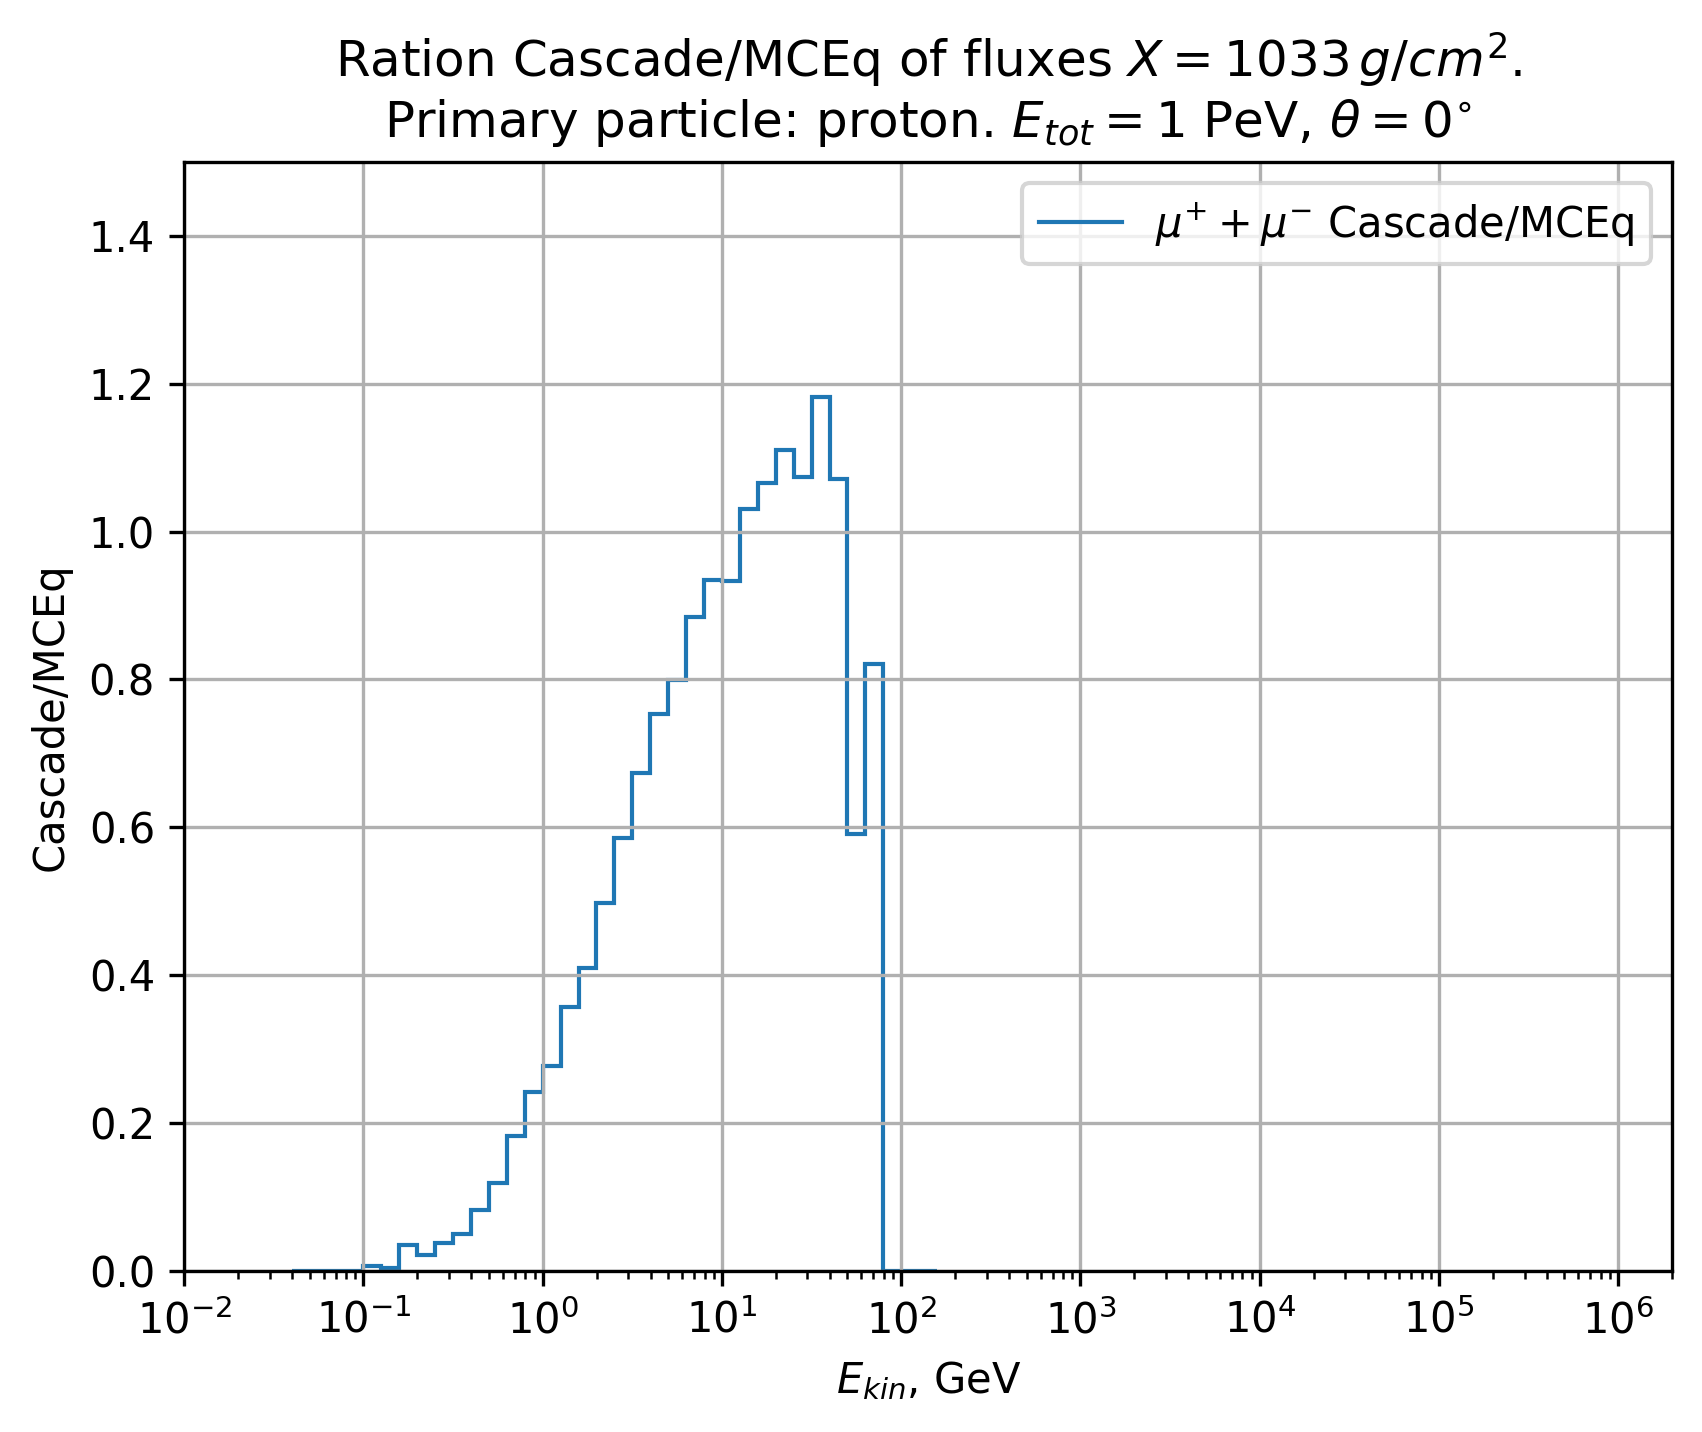

In [22]:
bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-13, 13), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')
plt.stairs(hist/mceq_dist.flux["mu"], mceq_dist.e_bins, 
           label = r"${\mu}^{+} + {\mu}^{-}$ Cascade/MCEq", linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-12, 12), bins = mceq_dist.e_bins)
# # plt.stairs(hist, bins, label = label, linestyle='-')
# plt.stairs(hist/mceq_dist.flux["nue"], mceq_dist.e_bins, 
#            label = r"$\bar{\nu}_{e} + {\nu}_{e}$ Cascade/MCEq", linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-14, 14), bins = mceq_dist.e_bins)
# # plt.stairs(hist, bins, label = label, linestyle='-')
# plt.stairs(hist/mceq_dist.flux["numu"], mceq_dist.e_bins, 
#            label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ Cascade/MCEq", linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11, 11), bins = mceq_dist.e_bins)
# # plt.stairs(hist, bins, label = label, linestyle='-')
# plt.stairs(hist/mceq_dist.flux["el"], mceq_dist.e_bins, 
#            label = r"${e}^{+} + {e}^{-}$ mceq no loss", linestyle='-')

# plt.stairs(mceq_loss.flux["mu"], mceq_loss.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq loss", linestyle='--')


plt.xscale("log")
plt.xlim(1e-2, 2e6)
plt.ylim(0, 1.5)
plt.legend()
plt.grid()

plt.title("Ration Cascade/MCEq of fluxes " +  r"$X = 1033\, g/cm^2.$"+ 
          "\nPrimary particle: proton. " 
          +  r"$E_{tot}=1$ PeV" + r", $\theta = 0^{\circ}$")
plt.xlabel(r"$E_{kin}$, GeV")
plt.ylabel(r"Cascade/MCEq")

Histogram of -13 with mass 0.10565837550000001
Histogram of 13 with mass 0.10565837550000001
Histogram of -12 with mass 0.0


/tmp/ipykernel_2399323/4154680584.py:3: RuntimeWarning: invalid value encountered in divide
  plt.stairs(hist/mceq_dist.flux["mu"], mceq_dist.e_bins,
/tmp/ipykernel_2399323/4154680584.py:8: RuntimeWarning: invalid value encountered in divide
  plt.stairs(hist/mceq_dist.flux["nue"], mceq_dist.e_bins,


Histogram of 12 with mass 0.0
Histogram of -14 with mass 0.0
Histogram of 14 with mass 0.0


/tmp/ipykernel_2399323/4154680584.py:13: RuntimeWarning: invalid value encountered in divide
  plt.stairs(hist/mceq_dist.flux["numu"], mceq_dist.e_bins,


Text(0, 0.5, 'Cascade/MCEq')

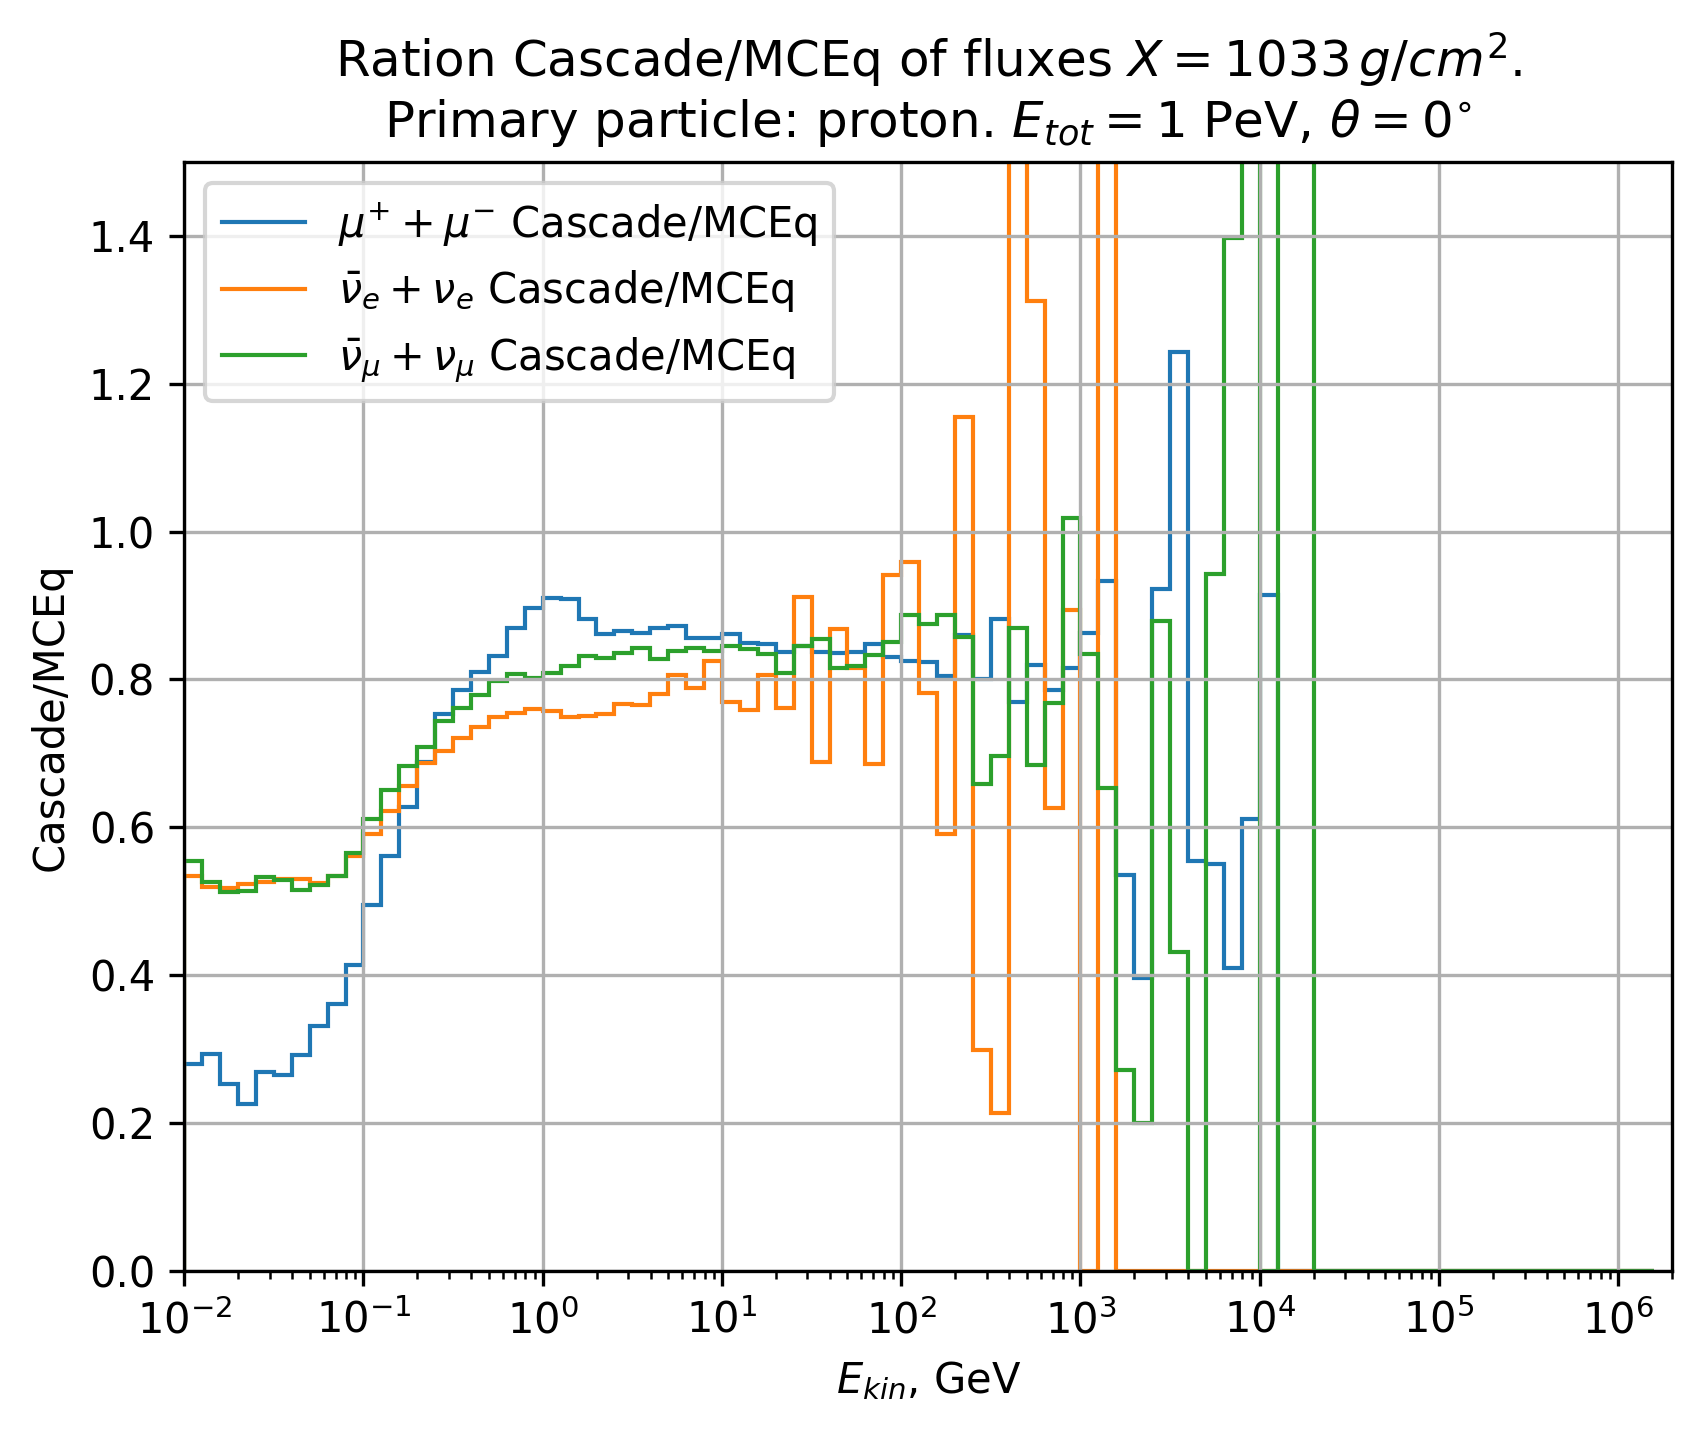

In [16]:
bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-13, 13), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')
plt.stairs(hist/mceq_dist.flux["mu"], mceq_dist.e_bins, 
           label = r"${\mu}^{+} + {\mu}^{-}$ Cascade/MCEq", linestyle='-')

bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-12, 12), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')
plt.stairs(hist/mceq_dist.flux["nue"], mceq_dist.e_bins, 
           label = r"$\bar{\nu}_{e} + {\nu}_{e}$ Cascade/MCEq", linestyle='-')

bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-14, 14), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')
plt.stairs(hist/mceq_dist.flux["numu"], mceq_dist.e_bins, 
           label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ Cascade/MCEq", linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11, 11), bins = mceq_dist.e_bins)
# # plt.stairs(hist, bins, label = label, linestyle='-')
# plt.stairs(hist/mceq_dist.flux["el"], mceq_dist.e_bins, 
#            label = r"${e}^{+} + {e}^{-}$ mceq no loss", linestyle='-')

# plt.stairs(mceq_loss.flux["mu"], mceq_loss.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq loss", linestyle='--')


plt.xscale("log")
plt.xlim(1e-2, 2e6)
plt.ylim(0, 1.5)
plt.legend()
plt.grid()

plt.title("Ration Cascade/MCEq of fluxes " +  r"$X = 1033\, g/cm^2.$"+ 
          "\nPrimary particle: proton. " 
          +  r"$E_{tot}=1$ PeV" + r", $\theta = 0^{\circ}$")
plt.xlabel(r"$E_{kin}$, GeV")
plt.ylabel(r"Cascade/MCEq")

Histogram of -13 with mass 0.10565837550000001
Histogram of 13 with mass 0.10565837550000001
Histogram of -12 with mass 0.0
Histogram of 12 with mass 0.0
Histogram of -14 with mass 0.0


/tmp/ipykernel_2279494/4154680584.py:3: RuntimeWarning: invalid value encountered in divide
  plt.stairs(hist/mceq_dist.flux["mu"], mceq_dist.e_bins,
/tmp/ipykernel_2279494/4154680584.py:8: RuntimeWarning: invalid value encountered in divide
  plt.stairs(hist/mceq_dist.flux["nue"], mceq_dist.e_bins,


Histogram of 14 with mass 0.0


/tmp/ipykernel_2279494/4154680584.py:13: RuntimeWarning: invalid value encountered in divide
  plt.stairs(hist/mceq_dist.flux["numu"], mceq_dist.e_bins,


Text(0, 0.5, 'Cascade/MCEq')

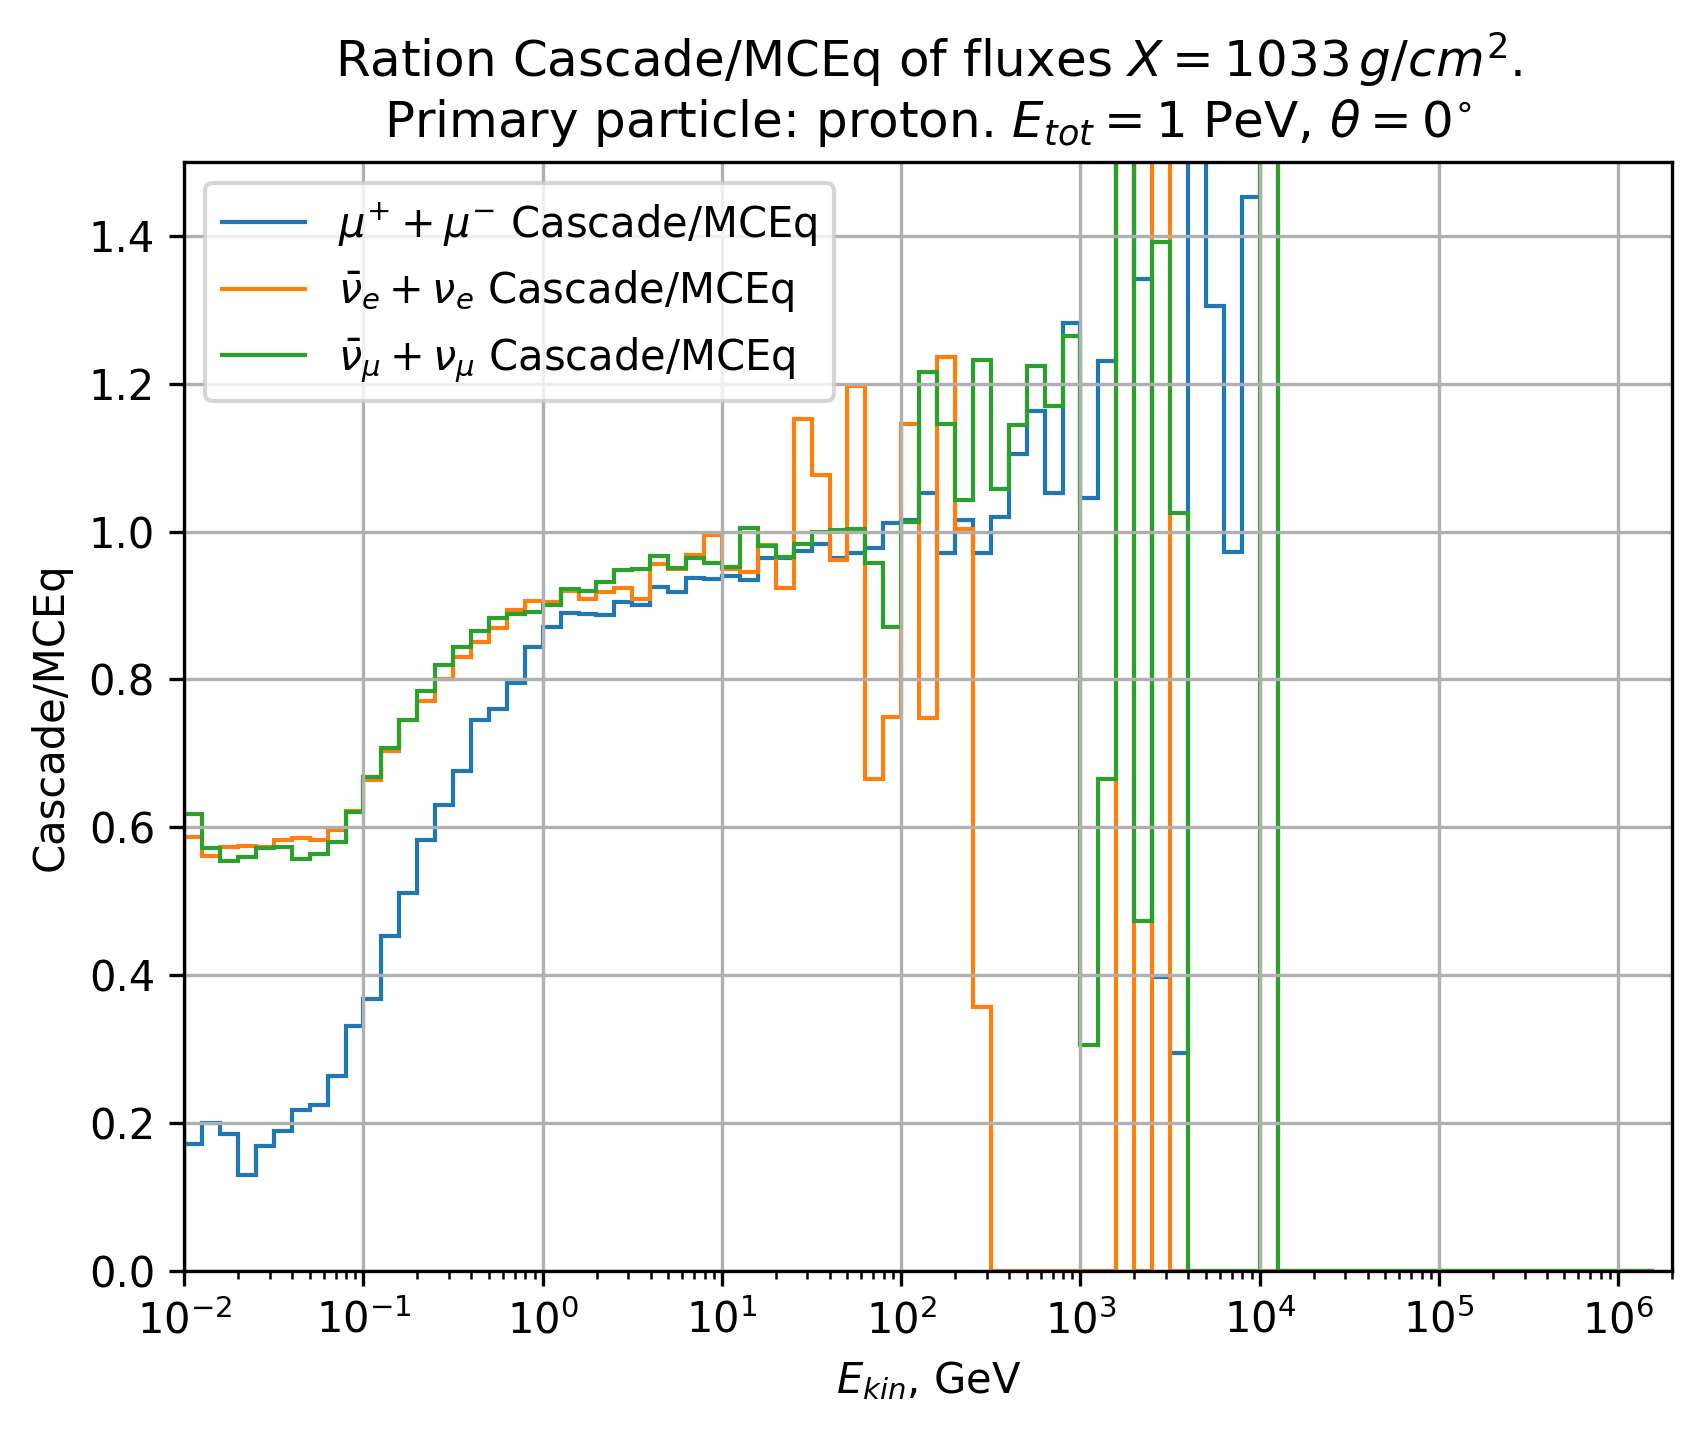

In [20]:
bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-13, 13), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')
plt.stairs(hist/mceq_dist.flux["mu"], mceq_dist.e_bins, 
           label = r"${\mu}^{+} + {\mu}^{-}$ Cascade/MCEq", linestyle='-')

bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-12, 12), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')
plt.stairs(hist/mceq_dist.flux["nue"], mceq_dist.e_bins, 
           label = r"$\bar{\nu}_{e} + {\nu}_{e}$ Cascade/MCEq", linestyle='-')

bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-14, 14), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')
plt.stairs(hist/mceq_dist.flux["numu"], mceq_dist.e_bins, 
           label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ Cascade/MCEq", linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11, 11), bins = mceq_dist.e_bins)
# # plt.stairs(hist, bins, label = label, linestyle='-')
# plt.stairs(hist/mceq_dist.flux["el"], mceq_dist.e_bins, 
#            label = r"${e}^{+} + {e}^{-}$ mceq no loss", linestyle='-')

# plt.stairs(mceq_loss.flux["mu"], mceq_loss.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq loss", linestyle='--')


plt.xscale("log")
plt.xlim(1e-2, 2e6)
plt.ylim(0, 1.5)
plt.legend()
plt.grid()

plt.title("Ration Cascade/MCEq of fluxes " +  r"$X = 1033\, g/cm^2.$"+ 
          "\nPrimary particle: proton. " 
          +  r"$E_{tot}=1$ PeV" + r", $\theta = 0^{\circ}$")
plt.xlabel(r"$E_{kin}$, GeV")
plt.ylabel(r"Cascade/MCEq")

In [86]:
final_particles = cas_driver.get_final_particles().valid()

In [5]:
from MCEq.core import MCEqRun
import mceq_config as config
import crflux.models as pm
config.mceq_db_fname = "/hetghome/antonpr/MCEq/MCEq/data/mceq_db_lext_dpm191_v150.h5"

mceq_run = MCEqRun(
            #provide the string of the interaction model
            interaction_model="DPMJET-III-19.1",
            #primary cosmic ray flux model
            primary_model = (pm.HillasGaisser2012, "H3a"),
            # Zenith angle in degrees. 0=vertical, 90=horizontal
            theta_deg=0,
            density_model = ("CORSIKA", ("USStd", None))
        )

MCEqRun::set_interaction_model(): DPMJETIII191
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)


In [163]:
from grid_collector import MceqGridCollector
grid_collector = MceqGridCollector(mceq_run=mceq_run,
                                   int_grid = [600, 800, 900, 1000])

1453
1453


In [164]:
grid_collector.add_particles(final_particles, 
                         nruns = cas_driver.runs_number)

In [142]:
svec = grid_collector.state_vectors()
sh_dist = grid_collector.shower_on_grid([13])

In [143]:
sh_dist[1:]

(array([13]), array([12], dtype=int32))

In [144]:
import matplotlib.pyplot as plt

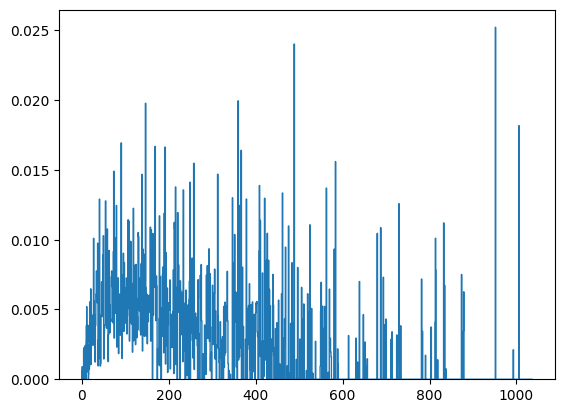

In [145]:
sdist = np.sum(sh_dist[0][:, 0, :], 
               axis = 1)
sidx = np.where(sdist > 0)[0]
sval = sdist[sidx]
# print(sidx)
plt.stairs(np.sum(sh_dist[0][:, 0, :], axis = 1), 
           grid_collector.sdepth_bins)
# plt.xlim(0, 900)

[13]
Min = 0.06 g/cm2, Max = 1195.93 g/cm2


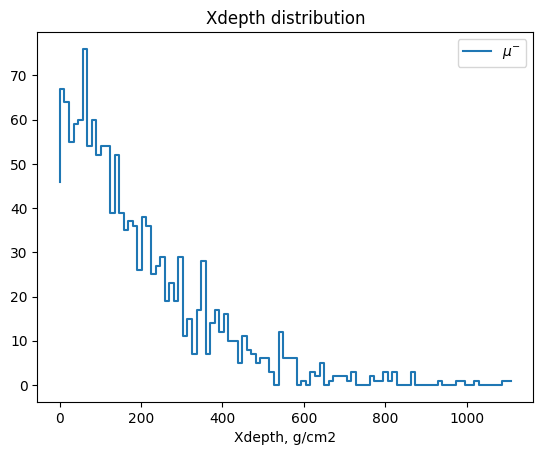

In [141]:
cascade_analysis.plot_xdepth_list([13])

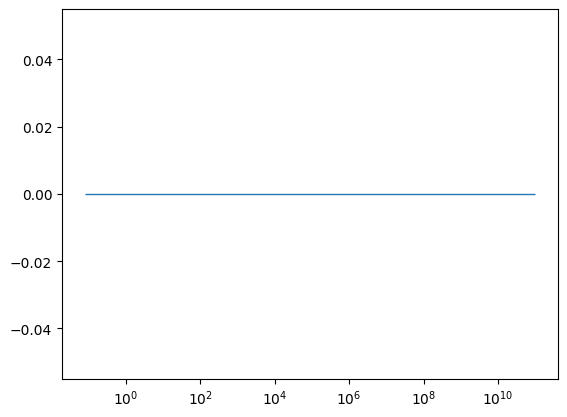

In [107]:
plt.stairs(sh_dist[0][1029, 0, :], hist_collector.energy_bins)
plt.xscale("log")

In [165]:
import mceq_solve_rhs
mceq_solve_rhs.solve_rhs(mceq_run, int_grid = [600, 800, 900, 1000], 
                     grid_var = "X",
                     rhs_source = grid_collector.state_vectors())

(1453,)
1453


In [166]:
grid_sol = mceq_run.grid_sol.reshape(
    mceq_run.grid_sol.shape[0],
    -1,
    len(mceq_run.e_grid)
)

In [167]:
hist_collector.pdg2idx_mapper.get_pids([13])

array([12], dtype=int32)

In [168]:
import matplotlib.pyplot as plt

(0.01, 100.0)

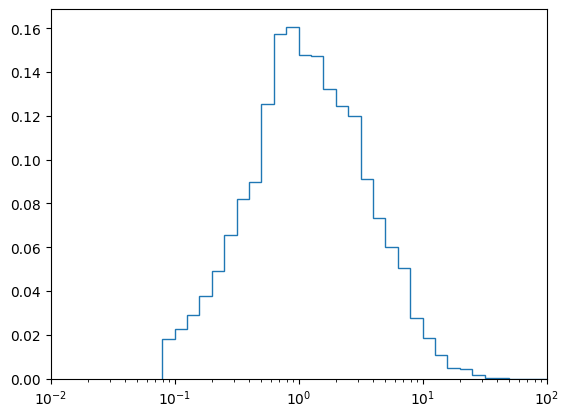

In [169]:

plt.stairs(grid_sol[0, 12], mceq_run.e_bins)
plt.xscale("log")
plt.xlim(1e-2, 1e2)

In [8]:
hist_collector.add_batch(final_particles)

In [1]:
sh_dist = hist_collector.get_shower_dist()

NameError: name 'hist_collector' is not defined

In [10]:
import matplotlib.pyplot as plt

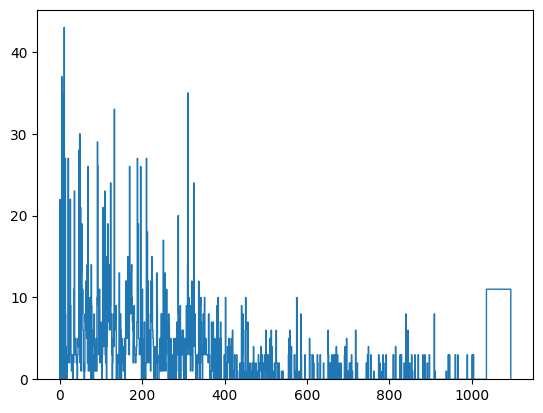

In [11]:
sd_dist = np.sum(sh_dist, axis = 1)
plt.stairs(sd_dist, hist_collector.sdepth_bins)
# plt.xlim(0, 100)

In [12]:
np.sum(sh_dist, axis = 1)

array([ 0,  0,  0, ...,  0,  0, 11])

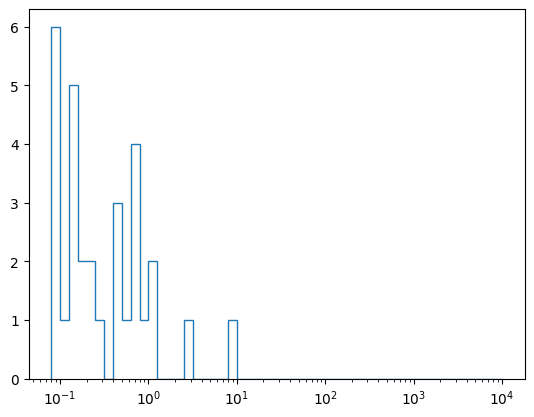

In [68]:
npp = 5
plt.stairs(np.sum(sh_dist[200:300, slice(51, 102, None)], axis = 0), hist_collector.energy_bins)
plt.xscale("log")

In [47]:
np.sum(sh_dist[-2, :])

0

In [13]:
en_bins = hist_collector.energy_bins
en_widths = hist_collector.energy_widths
en_grid = hist_collector.energy_grid

In [14]:
emats = []
for i in range(1, len(en_grid)-1):
    arr_rows = []
    for j in range(3):
        arr_rows.append(en_grid[i-1:i+2]**j)
    
    emats.append(np.linalg.inv(np.vstack(arr_rows) * en_widths[i-1:i+2]))
    
emats.insert(0, emats[0])  
emats.insert(-1, emats[-1])
emats = np.array(emats)  

In [15]:
dist3 = []
pid3 = []
for i in range(len(en_grid)):
    pidx = np.where(hist_collector.energy_idx == i)[0]
    vx = hist_collector.batch_energy[pidx]
    rightp = np.vstack([vx**0, vx, vx**2])
    dist3.append(np.matmul(emats[i], rightp))
    pid3.append(pidx)

In [125]:
sss_array = np.zeros([hist_collector.n_sdepth_grid, 
                hist_collector.n_particles,
                hist_collector.n_energy_grid], 
                dtype=np.float64)

sss_array.shape

(1249, 75, 51)

In [126]:
hist_collector.sdepth_idx[pid3[0]]
hist_collector.mceq_idx[pid3[0]]
hist_collector.energy_idx[pid3[0]]

shift_idx = np.zeros(len(en_grid), dtype = np.int32)
shift_idx[1:-1] = -1
shift_idx[-1] = -2
shift_idx

for ieg in range(len(en_grid)):        
    for i in range(3):
        np.add.at(sss_array, (hist_collector.sdepth_idx[pid3[ieg]], 
                        hist_collector.mceq_idx[pid3[ieg]], 
                        hist_collector.energy_idx[pid3[ieg]] + i + shift_idx[ieg]), 
            dist3[ieg][i, :])
    

In [150]:
np.sum(final_particles.energy)/cas_driver.runs_number

113.10622294029886

In [152]:
sss_array = sss_array/cas_driver.runs_number

In [151]:
np.sum(hist_collector.batch_energy)/cas_driver.runs_number

102.1794008131616

In [153]:
np.sum(sss_array[400], axis = 1)
np.sum(np.sum(sss_array[:, :] 
       * hist_collector.energy_widths
       * hist_collector.energy_grid, axis=2))

102.17940081316158

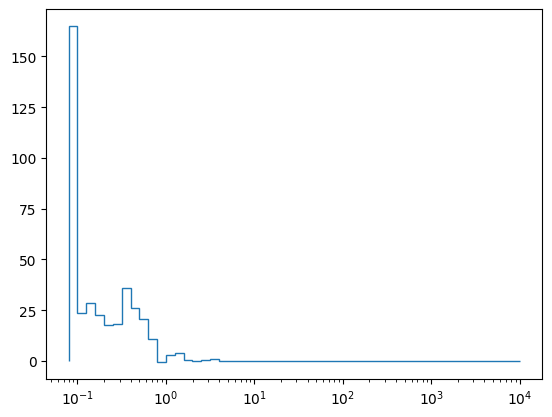

In [121]:
plt.stairs(sss_array[400, 14], hist_collector.energy_bins)
plt.xscale("log")

In [27]:
aa = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(2, 2, 2)
aa1 = aa.reshape(aa.shape[0], aa.shape[1] +  aa.shape[2])
aa1

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [43]:
aa = np.array([0, 0, 0])

np.add.at(aa, [1, 1, 1], np.array([1, 2, 5]))
# aa[[1, 1, 1]] += np.array([1, 2, 5])
aa

array([0, 8, 0])

In [15]:
# for i in range(len(en_grid)):
# for i in [1]:
#     pidx = np.where(hist_collector.energy_idx == i)[0]
    
#     rightp = np.vstack([hist_collector.batch_energy[pidx]**0,
#               hist_collector.batch_energy[pidx],
#               hist_collector.batch_energy[pidx]**2])
    
#     print(rightp.shape)
#     print(emats[i])
#     rres = np.matmul(emats[i], rightp)
#     print(rres[:,1])
    
#     test_arr = np.array([
#         hist_collector.batch_energy[pidx][1]**0,
#         hist_collector.batch_energy[pidx][1],
#         hist_collector.batch_energy[pidx][1]**2,
#     ])
#     print(f"test_arr = {test_arr}")
#     print(f"test_arr0 = {rightp[:, 1]}")
    
#     print(np.matmul(emats[i], test_arr))

# np.where(hist_collector.energy_idx == 10)

(3, 211)
[[   640.58104278 -10244.15104115  40417.93136746]
 [  -725.23035442  13271.45613394 -57607.09471932]
 [   202.56951211  -4078.26998572  20256.95121099]]
[-8.43695629 33.33435592  9.52281803]
test_arr = [1.         0.12522432 0.01568113]
test_arr0 = [1.         0.12522432 0.01568113]
[-8.43695629 33.33435592  9.52281803]


In [170]:
erows = []
for i in range(len(en_grid)):
    if i < 3:
        erows.append(en_grid**i)
    else:
        rrow = np.zeros_like(en_grid)
        rrow[i] = 1
        erows.append(rrow)
        
emat_tot = np.vstack(erows)
emat_tot = emat_tot * en_widths    

In [172]:
inv_emat2 = np.linalg.inv(emat_tot)

In [179]:
epp = 300
eidx = np.digitize(epp, en_bins) - 1

In [205]:
emats.shape

(51, 3, 3)

In [180]:
rpart = np.zeros_like(en_grid)
rpart[0]= 1
rpart[1] = epp
rpart[2] = epp**2
rpart[eidx] = 1
rpart

array([1.e+00, 3.e+02, 9.e+04, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00])

In [181]:
np.matmul(inv_emat2, rpart)

array([ 4.26917364e+08, -6.08503307e+08,  2.13984711e+08,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.53753611e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [148]:
# mrows = []
# for i in range(len(en_grid)):
#     mrows.append(en_widths*en_grid)
    
# emat_tot = np.vstack(mrows)    

In [151]:
nc = 35

emat2 = np.vstack(
            (
                en_widths[nc-1 : nc+1],
                en_widths[nc-1 : nc+1] * en_grid[nc-1 : nc+1]
            )
        )
inv_emat2 = np.linalg.inv(emat2)

E0 = 309.72385373024997
Dist(E0) = [-0.00931172  0.02277193]
Dist_solve(E0) = [-0.00931172  0.02277193]
Emid = 281.83829312644554
Bins = [158.48931925 199.5262315  251.18864315 316.22776602 398.10717055]
Dist(Emid) = [1.38777878e-17 1.53753611e-02]


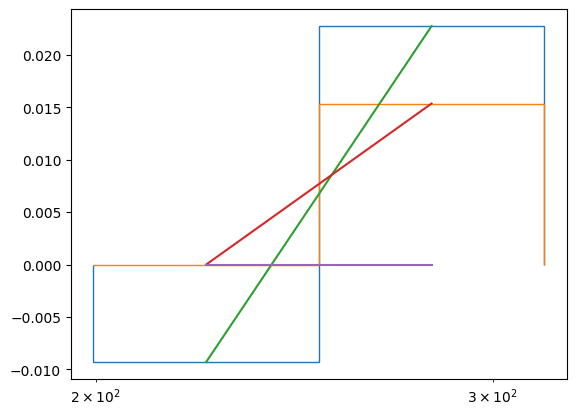

In [155]:
ee = en_bins[nc] + (en_bins[nc+1] - en_bins[nc]) * 0.9
print(f"E0 = {ee}")
e0_dist = np.matmul(inv_emat2, np.array([1,  ee]))
print(f"Dist(E0) = {e0_dist}")

e0_dist_solve = np.linalg.solve(emat2, np.array([1,  ee]))
print(f"Dist_solve(E0) = {e0_dist_solve}")
print(f"Emid = {en_grid[nc]}")
print(f"Bins = {en_bins[nc-2: nc+3]}")
emid_dist = np.matmul(inv_emat2, np.array([1,  en_grid[nc], 
                                           ]
                                          ))
print(f"Dist(Emid) = {emid_dist}")

plt.stairs(e0_dist, en_bins[nc-1: nc+2])
plt.stairs(emid_dist, en_bins[nc-1: nc+2])
# plt.stairs(e0_dist, en_bins[nc-2: nc+2])
plt.plot(en_grid[nc-1: nc+1], e0_dist)
plt.plot(en_grid[nc-1: nc+1], emid_dist)
plt.plot(en_grid[nc-1: nc+1], [0, 0])
plt.xscale("log")

In [138]:
nc = 35

emat4 = np.vstack(
            (
                en_widths[nc-2 : nc+2],
                en_widths[nc-2 : nc+2] * en_grid[nc-2 : nc+2],
                en_widths[nc-2 : nc+2] * (en_grid[nc-2 : nc+2])**2,
                en_widths[nc-2 : nc+2] * (en_grid[nc-2 : nc+2])**3,
            )
        )
inv_emat4 = np.linalg.inv(emat4)

E0 = 257.6925554375462
Dist(E0) = [-0.00228018  0.01037306  0.00916739 -0.00047099]
Dist_solve(E0) = [-0.00228018  0.01037306  0.00916739 -0.00047099]
Emid = 281.83829312644554
Bins = [158.48931925 199.5262315  251.18864315 316.22776602 398.10717055]
Dist(Emid) = [ 4.44089210e-16 -1.77635684e-15  1.53753611e-02 -1.11022302e-16]


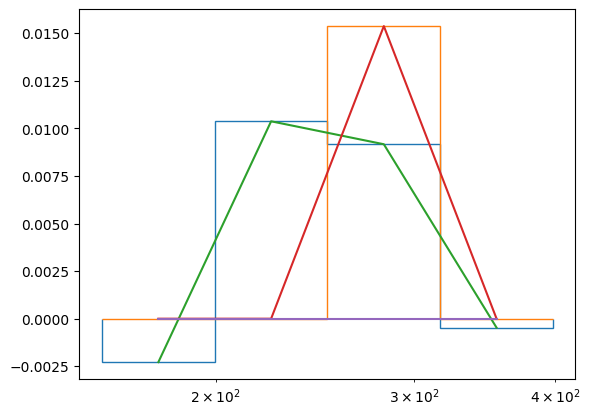

In [139]:
ee = en_bins[nc] + (en_bins[nc+1] - en_bins[nc]) * 0.1
print(f"E0 = {ee}")
e0_dist = np.matmul(inv_emat4, np.array([1,  ee, ee**2, ee**3]))
print(f"Dist(E0) = {e0_dist}")

e0_dist_solve = np.linalg.solve(emat4, np.array([1,  ee, ee**2, ee**3]))
print(f"Dist_solve(E0) = {e0_dist_solve}")
print(f"Emid = {en_grid[nc]}")
print(f"Bins = {en_bins[nc-2: nc+3]}")
emid_dist = np.matmul(inv_emat4, np.array([1,  en_grid[nc], 
                                           en_grid[nc]**2,
                                           en_grid[nc]**3,
                                           ]
                                          ))
print(f"Dist(Emid) = {emid_dist}")

plt.stairs(e0_dist, en_bins[nc-2: nc+3])
plt.stairs(emid_dist, en_bins[nc-2: nc+3])
# plt.stairs(e0_dist, en_bins[nc-2: nc+2])
plt.plot(en_grid[nc-2: nc+2], e0_dist)
plt.plot(en_grid[nc-2: nc+2], emid_dist)
plt.plot(en_grid[nc-2: nc+2], [0, 0, 0, 0])
plt.xscale("log")

In [120]:
nc = 35

emat5 = np.vstack(
            (
                en_widths[nc-2 : nc+3],
                en_widths[nc-2 : nc+3] * en_grid[nc-2 : nc+3],
                en_widths[nc-2 : nc+3] * (en_grid[nc-2 : nc+3])**2,
                en_widths[nc-2 : nc+3] * (en_grid[nc-2 : nc+3])**3,
                en_widths[nc-2 : nc+3] * (en_grid[nc-2 : nc+3])**4,
            )
        )
inv_emat5 = np.linalg.inv(emat5)

E0 = 257.6925554375462
Dist(E0) = [-1.60284200e-03  8.79853434e-03  1.05101792e-02 -9.68896094e-04
  6.77335606e-05]
Dist_solve(E0) = [-1.60284200e-03  8.79853434e-03  1.05101792e-02 -9.68896094e-04
  6.77335606e-05]
Emid = 281.83829312644554
Bins = [158.48931925 199.5262315  251.18864315 316.22776602 398.10717055
 501.18723363]
Dist(Emid) = [-7.56727095e-15  5.77113291e-15  1.53753611e-02 -1.57550038e-15
  2.17342954e-16]


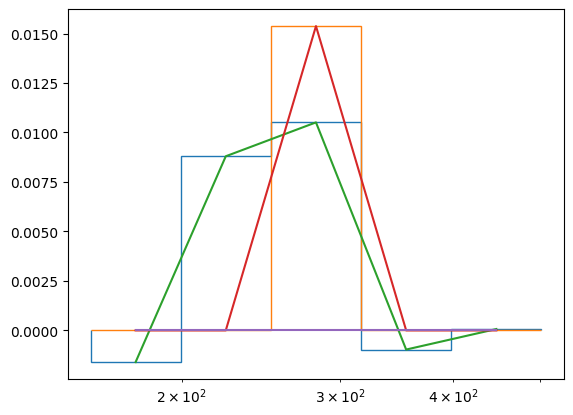

In [130]:
ee = en_bins[nc] + (en_bins[nc+1] - en_bins[nc]) * 0.1
print(f"E0 = {ee}")
e0_dist = np.matmul(inv_emat5, np.array([1,  ee, ee**2, ee**3, ee**4]))
print(f"Dist(E0) = {e0_dist}")

e0_dist_solve = np.linalg.solve(emat5, np.array([1,  ee, ee**2, ee**3, ee**4]))
print(f"Dist_solve(E0) = {e0_dist_solve}")
print(f"Emid = {en_grid[nc]}")
print(f"Bins = {en_bins[nc-2: nc+4]}")
emid_dist = np.matmul(inv_emat5, np.array([1,  en_grid[nc], 
                                           en_grid[nc]**2,
                                           en_grid[nc]**3,
                                           en_grid[nc]**4,
                                           ]
                                          ))
print(f"Dist(Emid) = {emid_dist}")

plt.stairs(e0_dist, en_bins[nc-2: nc+4])
plt.stairs(emid_dist, en_bins[nc-2: nc+4])
# plt.stairs(e0_dist, en_bins[nc-2: nc+2])
plt.plot(en_grid[nc-2: nc+3], e0_dist)
plt.plot(en_grid[nc-2: nc+3], emid_dist)
plt.plot(en_grid[nc-2: nc+3], [0, 0, 0, 0, 0])
plt.xscale("log")

In [156]:
nc = 35

emat = np.vstack(
            (
                en_widths[nc-1 : nc+2],
                en_widths[nc-1 : nc+2] * en_grid[nc-1 : nc+2],
                en_widths[nc-1 : nc+2] * (en_grid[nc-1 : nc+2])**2,
            )
        )
inv_emta = np.linalg.inv(emat)

E0 = -399.2025855078391
Dist(E0) = [ 1.30956726 -1.70764125  0.54235966]
Dist_solve(E0) = [ 1.30956726 -1.70764125  0.54235966]
Emid = 281.83829312644554
Bins = [199.5262315  251.18864315 316.22776602 398.10717055]
Dist(Emid) = [-5.03603547e-17  1.53753611e-02 -3.78850574e-18]


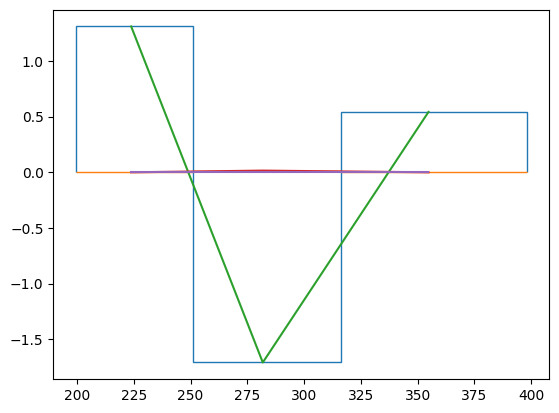

In [162]:
ee = en_bins[nc] + (en_bins[nc+1] - en_bins[nc]) * (-10)
print(f"E0 = {ee}")
e0_dist = np.matmul(inv_emta, np.array([1,  ee, ee**2]))
print(f"Dist(E0) = {e0_dist}")

e0_dist_solve = np.linalg.solve(emat, np.array([1,  ee, ee**2]))
print(f"Dist_solve(E0) = {e0_dist_solve}")
print(f"Emid = {en_grid[nc]}")
print(f"Bins = {en_bins[nc-1: nc+3]}")
emid_dist = np.matmul(inv_emta, np.array([1,  en_grid[nc], en_grid[nc]**2]))
print(f"Dist(Emid) = {emid_dist}")

plt.stairs(e0_dist, en_bins[nc-1: nc+3])
plt.stairs(emid_dist, en_bins[nc-1: nc+3])
# plt.stairs(e0_dist, en_bins[nc-2: nc+2])
plt.plot(en_grid[nc-1: nc+2], e0_dist)
plt.plot(en_grid[nc-1: nc+2], emid_dist)
plt.plot(en_grid[nc-1: nc+2], [0, 0, 0])

In [84]:
en_bins[nc], en_bins[nc+1], en_grid[nc]

(0.25118864315095807, 0.31622776601683794, 0.2818382931264454)

In [340]:
hist_collector.get_shower_dist([2212, 22, 13, 88, 2212, -432, 432, 22, 12])

(array([  12,   13,   22, 2212]),
 array([ 3,  8, 14, 24], dtype=int32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [29]:
sh_hist1, vpdg, vmceq_idx, sl_array = hist_collector.get_shower_dist([2212, 22, 11])

In [32]:
vpdg, vmceq_idx, sl_array

(array([  11,   22, 2212]),
 array([ 1, 14, 24], dtype=int32),
 [slice(0, 51, None), slice(51, 102, None), slice(102, 153, None)])

(0.0, 100.0)

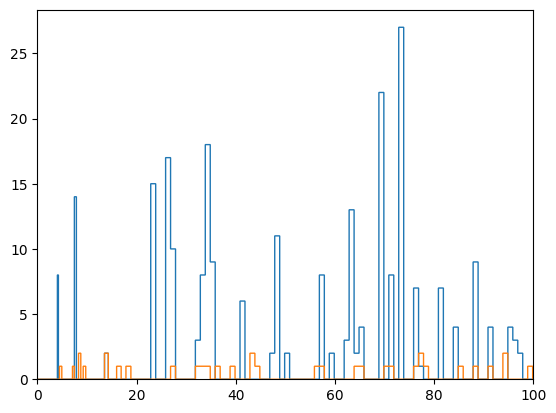

In [54]:
sd_dist1 = np.sum(hist_collector.get_shower_dist([22])[0], axis = 1)
sd_dist2 = np.sum(hist_collector.get_shower_dist([11])[0], axis = 1)
plt.stairs(sd_dist1, hist_collector.sdepth_bins)
plt.stairs(sd_dist2, hist_collector.sdepth_bins)
# plt.stairs(sd_dist, hist_collector.sdepth_bins)
plt.xlim(0, 100)

In [57]:
np.where((70 < hist_collector.sdepth_bins) & (hist_collector.sdepth_bins < 80))

(array([283, 284, 285, 286, 287, 288, 289, 290, 291, 292]),)

In [11]:
mceq_run.pman.n_cparticles
mceq_run.pman.dim_states

3825

In [273]:
mceq_run._calculate_integration_path(int_grid=None, grid_var="X")

In [371]:
mceq_run.set_theta_deg(0)
mceq_run.set_single_primary_particle(1e3, pdg_id = 2212)


In [ ]:
mceq_run.solve()

In [276]:
tot_sdepth = 0
for ip in range(len(mceq_run.integration_path[1])):
    tot_sdepth += mceq_run.integration_path[1][ip]
    print(mceq_run.integration_path[1][ip], tot_sdepth)

3.778740912186527e-05 3.778740912186527e-05
3.7787409121865295e-05 7.557481824373056e-05
3.7787409121865295e-05 0.00011336222736559585
3.778740912186528e-05 0.00015114963648746112
3.778740912186528e-05 0.0001889370456093264
3.778740912186528e-05 0.00022672445473119167
3.7787409121865295e-05 0.00026451186385305695
3.778740912186528e-05 0.00030229927297492225
3.778740912186527e-05 0.0003400866820967875
3.7787409121865295e-05 0.0003778740912186528
3.7787409121865295e-05 0.0004156615003405181
3.778740912186528e-05 0.0004534489094623834
3.778740912186528e-05 0.0004912363185842486
3.7787409121865295e-05 0.0005290237277061139
3.7787409121865295e-05 0.0005668111368279791
3.7787409121865295e-05 0.0006045985459498444
3.7787409121865295e-05 0.0006423859550717096
3.7787409121865295e-05 0.0006801733641935749
3.7787409121865295e-05 0.0007179607733154401
3.7787409121865295e-05 0.0007557481824373054
3.7787409121865295e-05 0.0007935355915591706
3.7787409121865295e-05 0.0008313230006810359
3.77874091218

In [274]:
tt_sdepth = np.cumsum(mceq_run.integration_path[1])

In [292]:
edge_sdepth = np.empty(len(tt_sdepth) + 1)

In [301]:
sdepth_start = 0
sdepth_end = 1095
sd_bin = (tt_sdepth[:-1] + tt_sdepth[1:])/2

sd_bin = np.insert(sd_bin, 0, sdepth_start)
sd_bin = np.append(sd_bin, sdepth_end)
sd_bin, tt_sdepth

(array([0.00000000e+00, 5.66811137e-05, 9.44685228e-05, ...,
        1.03485926e+03, 1.03585926e+03, 1.09500000e+03]),
 array([3.77874091e-05, 7.55748182e-05, 1.13362227e-04, ...,
        1.03435926e+03, 1.03535926e+03, 1.03635926e+03]))

In [293]:
edge_sdepth[0] = 0

for i in range(1, len(tt_sdepth)):
    edge_sdepth[i] = 2 * tt_sdepth[i] - edge_sdepth[i - 1]

In [294]:
for i in range(len(edge_sdepth)):
    print(edge_sdepth[i])

0.0
0.00015114963648746112
7.557481824373058e-05
0.00022672445473119167
0.00015114963648746112
0.0003022992729749222
0.0002267244547311917
0.0003778740912186528
0.0003022992729749222
0.0004534489094623834
0.0003778740912186528
0.000529023727706114
0.0004534489094623833
0.0006045985459498445
0.0005290237277061138
0.000680173364193575
0.0006045985459498443
0.0007557481824373055
0.0006801733641935748
0.000831323000681036
0.0007557481824373053
0.0009068978189247665
0.0008313230006810358
0.000982472637168497
0.0009068978189247661
0.0010580474554122276
0.0009824726371684969
0.0011336222736559583
0.0010580474554122276
0.001209197091899689
0.0011336222736559583
0.0012847719101434193
0.0012091970919046013
0.00136034676616011
0.0013412240594025146
0.00149271465818677
0.0014800695736131213
0.0016383547757903942
0.0016328367982232025
0.0017985978825598105
0.0018009216301146799
0.001974908185583566
0.0019858599294396463
0.002168896704522239
0.0021893415534049287
0.0023823359921567866
0.002413225797

In [ ]:
mceq_run.e_widths

In [ ]:
import particle
from particle import Particle

In [190]:
n_particles = mceq_run.pman.n_cparticles

n_energy_grid = len(mceq_run.e_grid)
n_energy_bins = n_energy_grid + 1
energy_bins = mceq_run.e_bins
# energy_bins = np.geomspace(1e0, 1e5, n_energy_bins)

n_sdepth_grid = 33
n_sdepth_bins = n_sdepth_grid + 1
sdepth_bins = np.linspace(0, 1033.0, n_sdepth_bins)

In [191]:
from data_structs.pdg_pid_map import PdgPidMap1, pdg2mceq_idx_map
pdg2mceq_pidx = PdgPidMap1(pdg2mceq_idx_map(mceq_run))

In [192]:
mceq_pidx = pdg2mceq_pidx.get_pids(final_particles.pid)
ptl_in_mceq = np.where(mceq_pidx != pdg2mceq_pidx.none_value)[0]
mceq_fin_particles = final_particles[ptl_in_mceq]

In [197]:
sdepth_idx = np.digitize(mceq_fin_particles.xdepth, 
                         sdepth_bins, right=True)

sdepth_filter_pts = np.where((sdepth_idx < len(sdepth_bins))
                             & (sdepth_idx > 0))[0]
sdepth_fin_particles = mceq_fin_particles[sdepth_filter_pts]

In [198]:
energy_idx = np.digitize(sdepth_fin_particles.energy, 
                         mceq_run.e_bins, right=True)

energy_filter_pts = np.where((energy_idx < len(mceq_run.e_bins))
                             & (energy_idx > 0))[0]
energy_fin_particles = sdepth_fin_particles[energy_filter_pts]

In [199]:
mceq_pt_idx = pdg2mceq_pidx.get_pids(energy_fin_particles.pid)

sdepth_idx = np.digitize(energy_fin_particles.xdepth, 
                         sdepth_bins, right=True)

sdepth_idx = sdepth_idx - 1

energy_idx = np.digitize(energy_fin_particles.energy, 
                         mceq_run.e_bins, right=True)

energy_idx = energy_idx - 1

hist_en_idx = mceq_pt_idx*len(mceq_run.e_grid) + energy_idx

In [202]:
shower_dist = np.zeros([n_sdepth_grid, n_particles*n_energy_grid], 
                       dtype=np.float64)

In [206]:
shower_dist.shape

(33, 3825)

In [215]:
print(f"Range of indicies for slant depth [{min(sdepth_idx), max(sdepth_idx)}"
      f" with length = {sdepth_idx.shape}")
print(f"Range of indicies for particle-energy [{min(hist_en_idx), max(hist_en_idx)}"
      f" with length = {hist_en_idx.shape}")

Range of indicies for slant depth [(0, 32) with length = (2912,)
Range of indicies for particle-energy [(0, 1239) with length = (2912,)


In [259]:
# Create a 2D NumPy array
# arr = np.zeros((3, 3), dtype=int)
shower_dist = np.zeros([n_sdepth_grid, n_particles*n_energy_grid], 
                       dtype=np.float64)
# Define the indices where you want to perform the addition
indices = np.array([sdepth_idx, hist_en_idx])

# indices[0]
# # Define the values you want to add at the specified indices
# values = np.array([[10, 20, 30], [40, 50, 60]])

# Perform the in-place addition using np.add.at
np.add.at(shower_dist, (sdepth_idx, hist_en_idx), 1)

# # Print the updated array
print(shower_dist)

[[1. 2. 2. ... 0. 0. 0.]
 [1. 3. 1. ... 0. 0. 0.]
 [1. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [223]:
shower_dist[indices[0], indices[1]] += 1

In [241]:
(indices[:,0],indices[:,1])

(array([1, 1, 3]), array([1, 1, 3]))

In [239]:

idx = np.array([[0], [0]])
a = np.array([[0, 0, 0, 0], [0, 0, 0, 0]])
np.add.at(a, tuple(idx.T), 1)
a

array([[2, 2, 2, 2],
       [0, 0, 0, 0]])

In [233]:
a[0, 0]

1

In [225]:
shower_dist

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [217]:
import numpy as np

# Create a 2D NumPy array
arr = np.zeros((3, 3), dtype=int)

# Define the indices where you want to perform the addition
indices = np.array([[0, 1, 2], [1, 2, 0]])

# Define the values you want to add at the specified indices
values = np.array([[10, 20, 30], [40, 50, 60]])

# Perform the in-place addition using np.add.at
np.add.at(arr, indices, values)

# Print the updated array
print(arr)

ValueError: array is not broadcastable to correct shape

In [ ]:
for idepth in range(len(sdepth_bins)):
    

In [82]:
# final_particles.xdepth

sdepth_idx = np.digitize(final_particles.xdepth, 
                         sdepth_bins, right=True)

In [90]:
len(sdepth_bins)

100

In [91]:
fp_at0 = final_particles[sdepth_idx == 100]

In [ ]:
fp_at0.xdepth

In [70]:


pidres = pdg_mceq_idx.get_pids(final_particles.pid)

In [71]:
ptcl_inx = np.where(pidres != pdg_mceq_idx.none_value)[0]

energy_idx = np.digitize(final_particles.energy[ptcl_inx], 
                         mceq_run.e_bins, right=True)

In [76]:
hist_en_idx = pidres[ptcl_inx]*len(mceq_run.e_grid) + energy_idx

In [ ]:
mceq_run.pman.pdg2mceqidx[(22, 0)] * len(mceq_run.e_grid) + eidx

In [78]:
n_particles = 50
n_energy_bins = 101
n_sdepth_bins = 100
energy_bins = np.geomspace(1e0, 1e5, n_energy_bins)
sdepth_bins = np.linspace(0, 1033.0, n_sdepth_bins)

In [62]:
energy_idx = np.digitize(final_particles.energy, 
                         energy_bins, right=True)

In [63]:
energy_idx

array([19, 13,  1, ...,  0,  0,  0])

In [4]:
shower_dist = np.zeros([n_sdepth_bins, n_energy_bins*n_particles], 
                       dtype=np.float64)

In [8]:
shower_dist.shape
shower_dist[0, 4:10]

array([0., 0., 0., 0., 0., 0.])

In [189]:
a = np.array([1, 2, 3, 4])
b = np.array([1, 2])
np.add.at(a, [0, 1, 1], b)
a

ValueError: array is not broadcastable to correct shape